In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [10]:
train_df = pd.read_csv("twitter_training.csv")
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Display the first few rows of the validation dataset
validation_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
# Check for missing values in the training dataset
train_df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [4]:
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

In [6]:
train_df.head()

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
# Check for missing values in the validation dataset
validation_df.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

Data Visualization

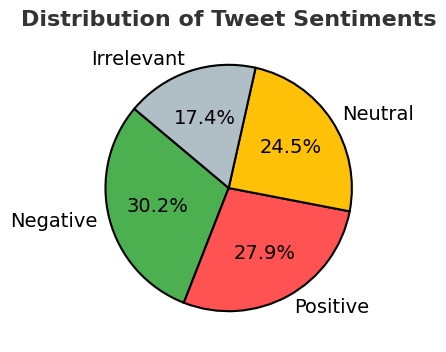

In [10]:
sentiment_counts = train_df['Sentiment'].value_counts()
colors = ['#4CAF50', '#FF5252', '#FFC107', '#B0BEC5']  # Green for Positive, Red for Negative, Yellow for Neutral, Gray for Irrelevant

plt.figure(figsize=(6, 4))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 14}
)
plt.title("Distribution of Tweet Sentiments", fontsize=16, fontweight='bold', color='#333333')

plt.show()


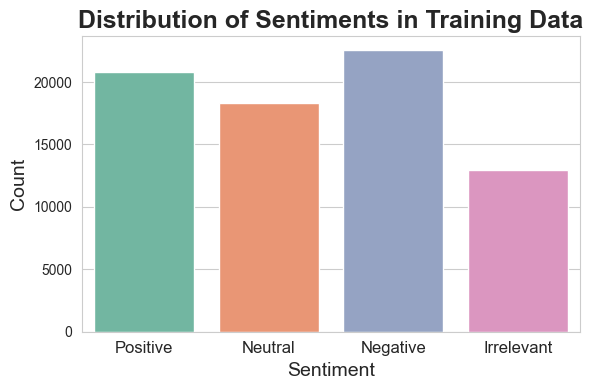

In [12]:
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", 4)  # 4 colors for 4 sentiments
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Sentiment', data=train_df, palette=palette)
plt.title('Distribution of Sentiments in Training Data', fontsize=18, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

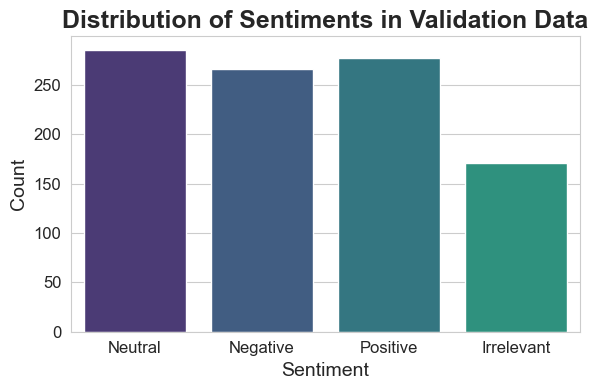

In [21]:
sns.set_style("whitegrid")  # White background with grid lines
palette = sns.color_palette("viridis")

plt.figure(figsize=(6,4))  
sns.countplot(x='Irrelevant', data=validation_df, palette=palette)
plt.title('Distribution of Sentiments in Validation Data', fontsize=18, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
# Custom color function to style word clouds
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return f"hsl({random_state.randint(0, 255)}, 100%, 50%)"

# Function to generate and display styled word clouds for each sentiment
def generate_styled_wordcloud(data, sentiment):
    # Update to use the correct 'Sentiment' column
    text = ' '.join(data[data['Sentiment'] == sentiment]['Text'].fillna(''))

    # Create word cloud with custom color function
    wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=200, color_func=random_color_func).generate(text)

    # Display the word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment", fontsize=16)
    plt.show()

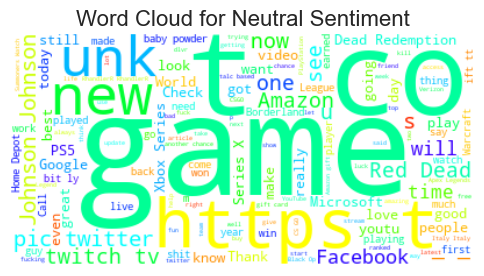

In [33]:
generate_styled_wordcloud(train_df, 'Neutral')

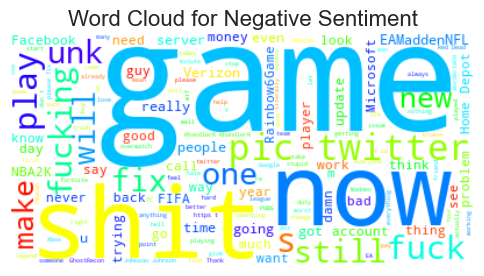

In [34]:
generate_styled_wordcloud(train_df, 'Negative')

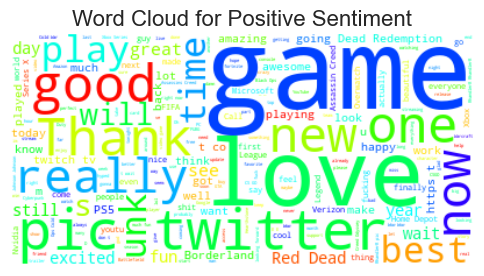

In [35]:
generate_styled_wordcloud(train_df, 'Positive')

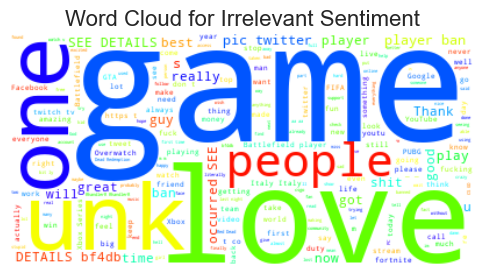

In [36]:
generate_styled_wordcloud(train_df, 'Irrelevant')

In [9]:
sentiment_mapping = {
    'Positive': 4,
    'Negative': 0,
    'Neutral': 2,
    'Irrelevant': -1
}

# Map the sentiment values to a new column in train_df
train_df['sentiment_value'] = train_df['Sentiment'].map(sentiment_mapping)

In [92]:
train_df.to_csv('train_data.csv', index=False)  # Overwrites the original file

In [8]:
train_df.head()

,ID,Entity,Sentiment,Text,sentiment_value
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,4
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,4
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,4
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,4


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               74681 non-null  int64 
 1   Entity           74681 non-null  object
 2   Sentiment        74681 non-null  object
 3   Text             73995 non-null  object
 4   sentiment_value  74681 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.8+ MB


In [17]:
X = train_df['Text'].fillna('')
y = train_df['sentiment_value']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Building and Training the model

In [98]:
# Build and train the model
logi_model = LogisticRegression()
logi_model.fit(X_train_vec, y_train)

LogisticRegression()

In [100]:
# Make predictions
y_pred = logi_model.predict(X_test_vec)

In [101]:
# Evaluate the model
logi_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {logi_accuracy}")

Logistic Regression Accuracy: 0.7729129008502377


In [102]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.79      0.65      0.72      2661
           0       0.79      0.84      0.81      4471
           2       0.75      0.74      0.74      3551
           4       0.77      0.81      0.79      4254

    accuracy                           0.77     14937
   macro avg       0.77      0.76      0.76     14937
weighted avg       0.77      0.77      0.77     14937



In [103]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vec, y_train)

DecisionTreeClassifier()

In [104]:
tree_accuracy = accuracy_score(y_test, y_pred)
tree_pred = tree_model.predict(X_test_vec)

In [105]:
print(f"Decision Tree Accuracy: {tree_accuracy}")

Decision Tree Accuracy: 0.7729129008502377


In [106]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.79      0.65      0.72      2661
           0       0.79      0.84      0.81      4471
           2       0.75      0.74      0.74      3551
           4       0.77      0.81      0.79      4254

    accuracy                           0.77     14937
   macro avg       0.77      0.76      0.76     14937
weighted avg       0.77      0.77      0.77     14937



In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier()

In [21]:
rf_pred = rf_model.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9132355894757983


In [23]:
report = classification_report(y_test, rf_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.98      0.85      0.91      2661
           0       0.92      0.93      0.93      4471
           2       0.89      0.92      0.90      3551
           4       0.90      0.93      0.91      4254

    accuracy                           0.91     14937
   macro avg       0.92      0.91      0.91     14937
weighted avg       0.92      0.91      0.91     14937



<Figure size 600x400 with 0 Axes>

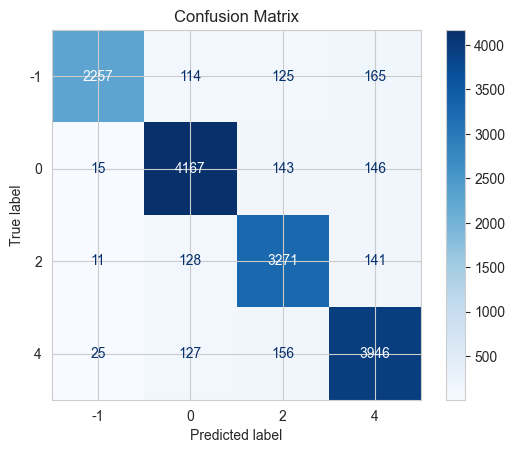

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming your model is named 'model'
# Get predictions for the test set
y_pred = rf_model.predict(X_test_vec)

# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [110]:
# Model names and their corresponding accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [logi_accuracy, tree_accuracy, rf_accuracy]

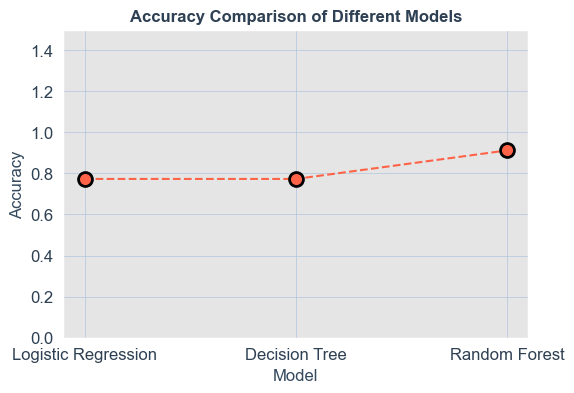

In [112]:
# Set a background style for the plot
plt.style.use('ggplot')

# Create the figure with larger size
plt.figure(figsize=(6, 4))

# Customize line and markers
plt.plot(models, accuracies, marker='o', linestyle='--', color='#ff6347', markersize=10, markeredgewidth=2, markeredgecolor='black')

# Add titles and labels with custom fonts
plt.title('Accuracy Comparison of Different Models', fontsize=12, fontweight='bold', color='#2e4053')
plt.xlabel('Model', fontsize=12, color='#34495e')
plt.ylabel('Accuracy', fontsize=12, color='#34495e')

# Customize y-axis to ensure accuracy range is from 0 to 1
plt.ylim([0, 1.5])
plt.xticks(fontsize=12, color='#2e4053')  # Rotate x labels for better readability
plt.yticks(fontsize=12, color='#2e4053')

# Add grid with customization for better readability
plt.grid(True, linestyle='-', linewidth=0.5, color='#b0c4de')

# Display the plot
plt.show()


In [113]:
import pickle

# Save the model
with open('final_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [114]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Create and fit your vectorizer (if not already done)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)  # Assuming X_train is defined

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [115]:
# Assuming your model training code is here...

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the model
with open('final_model.pkl', 'wb') as f:
    pickle.dump(loaded_model, f)


In [116]:
import pickle

# Load the model
with open('final_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Function to predict sentiment remains the same...


In [126]:
def predict_sentiment(tweet):
    # Preprocess and vectorize the input tweet
    tweet_vector = vectorizer.transform([tweet])

    # Make a prediction
    prediction = loaded_model.predict(tweet_vector)
    
    # Print the prediction for debugging
    print(f"Raw prediction: {prediction}")

    # Map the prediction to a label
    sentiment_labels = {
        0: 'Negative',
        2: 'Neutral',
        4: 'Positive',
        -1: 'Irrelative'
    }
    sentiment = sentiment_labels.get(prediction[0], "Unknown")
    
    return sentiment


In [125]:
# Input tweet from the user
user_tweet = input("Enter a tweet for sentiment analysis: ")

# Predict sentiment
result = predict_sentiment(user_tweet)
print(f"The sentiment of the tweet is: {result}")

Enter a tweet for sentiment analysis:  sad, ugly, bad 


Raw prediction: ['Negative']
The sentiment of the tweet is: Unknown


In [141]:
def predict_sentiment(tweet):
    # Preprocess and vectorize the input tweet
    tweet_vector = vectorizer.transform([tweet])

    # Make a prediction
    prediction = loaded_model.predict(tweet_vector)
    
    # Print the prediction for debugging
    print(f"Raw prediction: {prediction}")

    # Since the prediction is already in string format, we can directly return it
    sentiment = prediction[0]  # Extract the first (and only) prediction
    
    return sentiment

# Input tweet from the user
user_tweet = input("Enter a tweet for sentiment analysis: ")

# Predict sentiment
result = predict_sentiment(user_tweet)
print(f"The sentiment of the tweet is: {result}")


Enter a tweet for sentiment analysis:  im the worst


Raw prediction: ['Negative']
The sentiment of the tweet is: Negative
